# HR-аналитика

## Введение

**Описание проекта:**

Заказчик - компания "Работа с заботой". Бизнес предоставил данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

При помощи входящих данных необходимо решить **две задачи**:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Цель проекта:**

Разработать решение, которое позволит бизнесу избежать финансовых потерь и оттока сотрудников.

**Описание данных:**

- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании (целевой признак задачи 1).
- `quit` — увольнение сотрудника из компании (целевой признак задачи 2).

**План работ:**
1. Загрузить и изучить данные первоначально
2. Провести предобработку данных
3. Обучение модели для прогнозирования уровня удовлетворенности работой
    - 3.1 Исследовательский анализ данных
    - 3.2 Подготовка данных
    - 3.3 Обучение модели
    - 3.4 Оформление выводов
4. Обучение модели для прогнозирования увольнения
    - 4.1 Исследовательский анализ данных (в том числе составление портрета "уволившегося сотрудника")
    - 4.2 Добавление нового признака - уровня удовлетворенности работой
    - 4.3 Подготовка данных
    - 4.4 Обучение модели
    - 4.5 Оформление выводов
5. Общий вывод

## Загрузка и первичное изучение данных

Загрузим данные и изучим их

In [1]:
# Установка необходимых библиотек
#!pip install -U scikit-learn -q
#!pip install phik -q
#!pip install shap
#!pip install matplotlib==3.7.3

In [2]:
# Необходимые импорты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV
)

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler
)

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    roc_auc_score,
    make_scorer
)

import shap
import phik
from phik import phik_matrix


Bad key text.latex.preview in file /opt/anaconda3/envs/practicum/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.3/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/envs/practicum/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.3/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/envs/practicum/lib/python3.11/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

In [3]:
# Считывание данных
# Для задачи №1
try:
train_df_jsr = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
X_test_jsr = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
y_test_jsr = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')

# Для задачи №2
train_df_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
X_test_quit = X_test_jsr.copy()
y_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

Данные загружены. Выведем по 5 строк каждого датафрейма, изучим данные и их описание немного детальнее.

#### train_df_jsr

In [4]:
train_df_jsr.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [5]:
train_df_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


В нашем распоряжении данные о 4000 сотрудников, есть пропуски в колонках с отделом и уровнем сотрудника.

#### X_test_jsr

In [6]:
X_test_jsr.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [7]:
X_test_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


В тестовой выборке данные о 2000 сотрудников, есть пропуски в колонках с отделом и уровнем сотрудника.

#### y_test_jsr

In [8]:
y_test_jsr.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [9]:
y_test_jsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


В целевом признаке тестовой выборки 2000 строк (совпадает с количеством строк датасета с входными признаками). Пропуски отсутствуют.

#### train_df_quit

In [10]:
train_df_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [11]:
train_df_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


В нашем распоряжении данные о 4000 покупателей. Пропуски отсутствуют.

#### X_test_quit 

Датасет - копия X_train_jsr, еще раз изучать не будем.

#### y_test_quit

In [12]:
y_test_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


In [13]:
y_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


В целевом признаке тестовой выборки 2000 строк (совпадает с количеством строк датасета с входными признаками). Пропуски отсутствуют.

**Вывод по первичному изучению данных:**
- Данные соответствуют заявленному описанию
- В данных есть пропуски
- Названия столбцов, типы данных оптимальны

## Предобработка данных

### Пропущенные значения

#### train_df_jsr

Изучим пропуски более детально

In [14]:
train_df_jsr.loc[(train_df_jsr['dept'].isna()) | (train_df_jsr['level'].isna())]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Пропущенные значения есть всего в 10 строках, судя по всему пропуски случайны. Обработаем их позже в пайплайне.

In [15]:
X_test_jsr.loc[(X_test_jsr['dept'].isna()) | (X_test_jsr['level'].isna())]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


Пропущенные значения есть всего в 3 строках, судя по всему пропуски случайны. Обработаем их позже в пайплайне, аналогично прошлому датасету.

### Обработка дубликатов

Дубликаты могут возникнуть только в датасетах, хранящих входные признаки. Проверим, есть ли в них явные дубликаты и удалим их, если есть.

In [16]:
train_df_jsr.duplicated().sum()

0

In [17]:
X_test_jsr.duplicated().sum()

0

In [18]:
train_df_quit.duplicated().sum()

0

In [19]:
X_test_quit.duplicated().sum()

0

Явные дубликаты отсутствуют. Проверим, есть ли в данных неявные дубликаты.

In [20]:
# Реализуем функцию для отображения
def display_unique_values(df):
    for column_name in df.select_dtypes(exclude='number').columns:
        print(f'{column_name}:', df[column_name].unique())

#### train_df_jsr

In [21]:
display_unique_values(train_df_jsr)

dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'high' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


#### X_test_jsr

In [22]:
display_unique_values(X_test_jsr)

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


#### train_df_quit

In [23]:
display_unique_values(train_df_quit)

dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'sinior']
workload: ['high' 'medium' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
quit: ['no' 'yes']


#### X_test_quit

In [24]:
display_unique_values(X_test_quit)

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']


- В данных есть как пропуски, так и **пустые строки** в значениях категориальных признаков
- В датафреймах отсутствуют неявные дубликаты, но значение уровня `'senior'` везде указано с ошибкой. Исправим это.
- Поместим `'id'` в индекс таблиц, чтобы он не мешал. Это может привести к тому, что в таблице появятся строки, в которых входные признаки совпадают - эти данные не несут ценности для обучения модели, поэтому их можно будет сразу удалить.

In [25]:
# 'id' ставим в индекс именно здесь, так как здесь перебираем все датафреймы в цикле
for df in [train_df_jsr, train_df_quit, X_test_jsr, X_test_quit]:
    df.loc[df['level'] == 'sinior', 'level'] = 'senior'
    df.set_index('id', inplace=True)
    display_unique_values(df)
    print(
        f'Количество пустых строк в значениях признаков: {len(df.loc[(df["dept"] == " ") | (df["workload"] == " ")])}')
    print(f'Количество явных дубликатов после удаления "id": {df.duplicated().sum()}\n')
    df = df.drop_duplicates()

dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level: ['junior' 'middle' 'senior' nan]
workload: ['medium' 'high' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
Количество пустых строк в значениях признаков: 0
Количество явных дубликатов после удаления "id": 245

dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'senior']
workload: ['high' 'medium' 'low']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
quit: ['no' 'yes']
Количество пустых строк в значениях признаков: 0
Количество явных дубликатов после удаления "id": 1413

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'senior' nan]
workload: ['medium' 'low' 'high' ' ']
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
Количество пустых строк в значениях признаков: 2
Количество явных дубликатов после удаления "id": 557

dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' '

**Вывод по Предобработке данных:**
- В данных есть пропуски, их не много (менее 1% от всех данных). Они будут обработаны при помощи пайплайна для предобработки данных (так как это указано в условии задачи)
- В данных отсутствуют дубликаты
- `'id'` теперь индекс датафреймов
- Типы данных оптимальны

## Уровень удовлетворенности работой. Исследовательский анализ данных

Проведем исследовательский анализ всех признаков, сразу сравнивая распрееления на тестовых данных и тренировочных. **Выводы по графикам будут оформлены по тренировочным данным.**

Начнем с количественных признаков. Посмотрим на их распределение и описание. Сразу проведем сравнение с тестовой выборкой (выделим графики другим цветом).

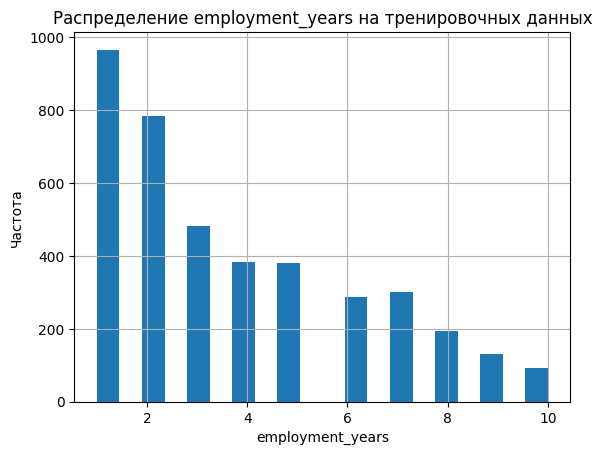

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


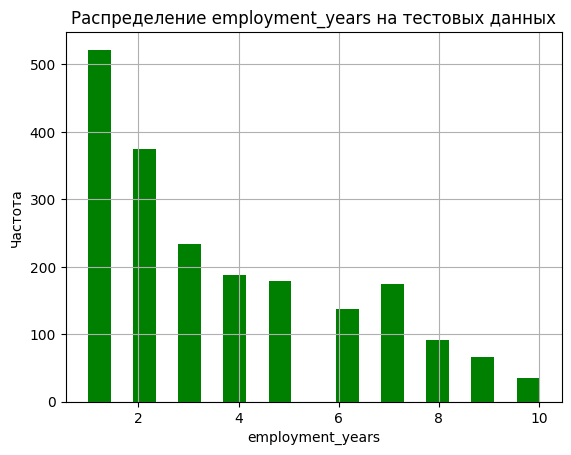

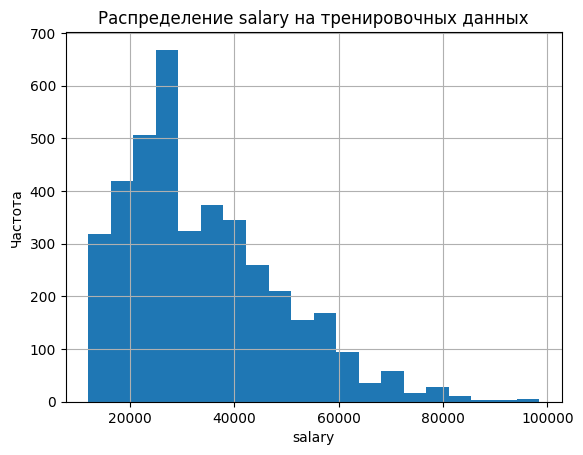

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64


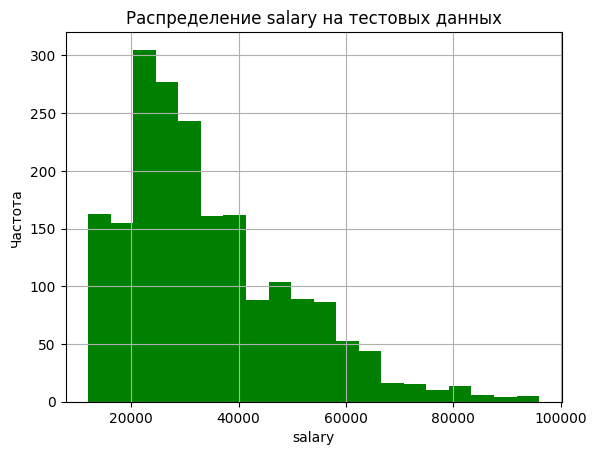

In [26]:
for feature in ['employment_years', 'salary']:
    train_df_jsr[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} на тренировочных данных')
    plt.show()
    print(train_df_jsr[feature].describe())
    X_test_jsr[feature].hist(bins=20, color='g')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} на тестовых данных')
    plt.show()
    X_test_jsr[feature].describe()

**Интерпретация графиков:**
1. Распределение длительности работы в компании не имееет форму нормального, чем больше этот признак, тем меньше частота. В среднем сотрудники работают в компании 3.7 года (медиана 3 года)
2. Форма распределения зарплаты сотрудников напоминает нормальное со смещением влево, также присутствует очень высокий пик около 30.000, это значение похоже на среднее и медиану.
3. Распределения в тренировочной выборке имеют такую же форму.
4. В распределении зарплаты присутствуют данные, похожие на выбросы - значения больше 82.000, изучим их детальнее.

In [27]:
train_df_jsr.loc[train_df_jsr['salary'] >= 82000]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
538347,technology,senior,high,3,no,no,1,84000,0.21
148024,technology,senior,high,4,no,no,4,94800,0.67
494125,marketing,senior,high,10,no,no,4,84000,0.81
355174,technology,senior,high,6,no,yes,4,88800,0.74
642094,technology,senior,high,6,no,no,5,88800,0.83
961485,technology,senior,high,9,no,no,3,84000,0.40
978915,technology,senior,high,7,no,no,1,92400,0.45
881760,marketing,senior,high,6,no,no,4,84000,0.75
722664,technology,senior,high,8,no,no,2,85200,0.35


Специалисты с зарплатой больше 82 тысяч - в основном, представители технологического блока, которые работают в компании много лет, и все имеют высокий уровень загрузки. Не будем удалять эти данные, так как они не являются выбросами.

Признаки `уровень специалиста`, `загруженность`, `было ли повышение` и `нарушение договора` визуализируем при помощи круговой диаграммы.

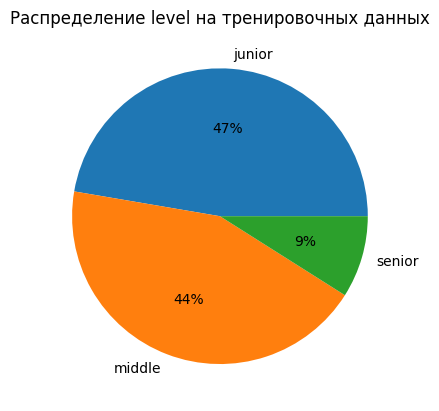

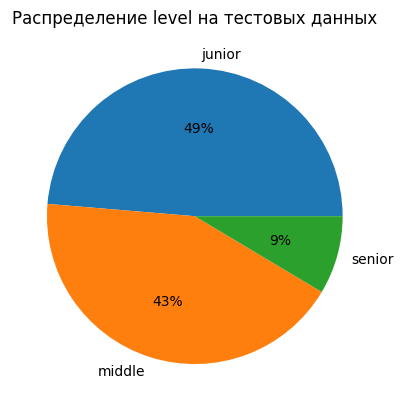

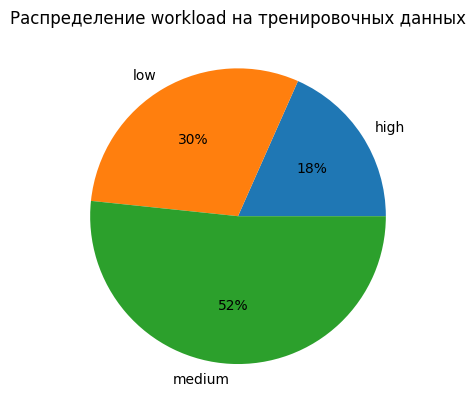

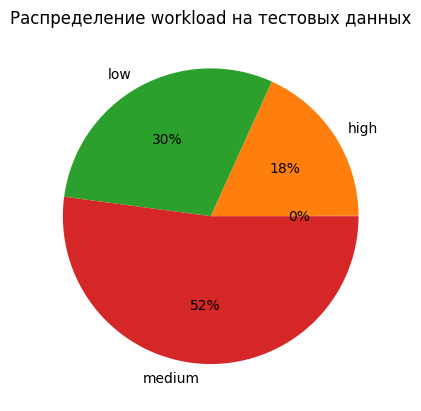

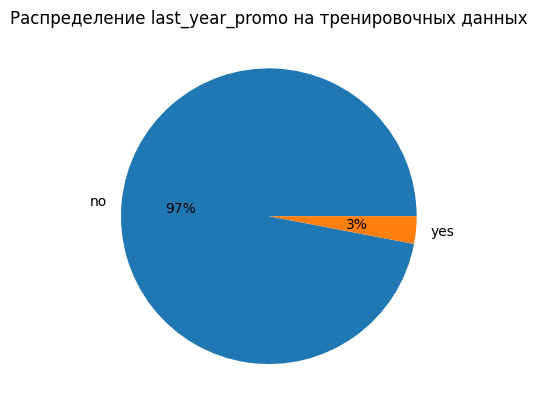

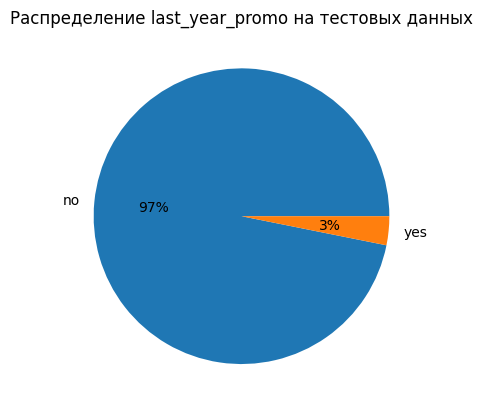

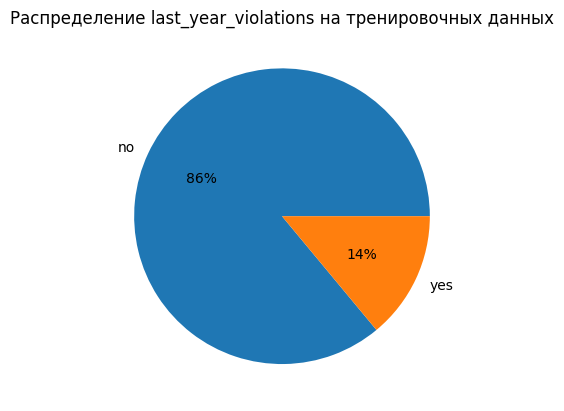

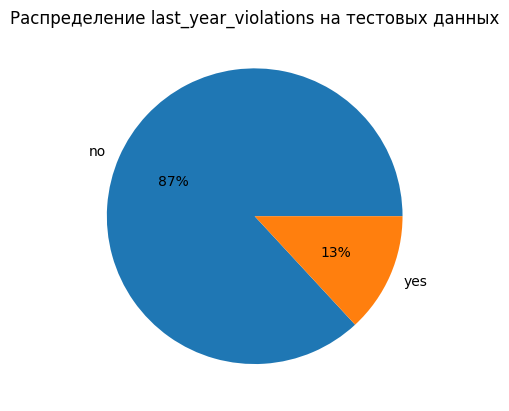

In [28]:
for feature in ['level', 'workload', 'last_year_promo', 'last_year_violations']:
    train_df_jsr.pivot_table(index=feature, values='dept', aggfunc='count').plot(
        kind='pie', x=feature, y='dept', autopct='%1.0f%%', legend=False)
    plt.title(f'Распределение {feature} на тренировочных данных')
    plt.ylabel('')
    
    X_test_jsr.pivot_table(index=feature, values='dept', aggfunc='count').plot(
        kind='pie', x=feature, y='dept', autopct='%1.0f%%', legend=False)
    plt.title(f'Распределение {feature} на тестовых данных')
    plt.ylabel('')

**Интерпретация графиков:**
- Распределения на тестовых и тренировочных данных очень похожие
- Большая часть сотрудников - начального и среднего уровня (junior и middle), 47% и 44% соответственно. Ведущих специалистов (senior) - всего 9%
- 52% сотрудников имеют среднюю загруженность, 30% - низкую, и только 18% - высокую
- 97% сотрудников не получали повышение за последний год и всего оставшиеся 3% получили
- 86% сотрудников не нарушали трудовой договор за последний год, 14% нарушали.

Признаки `Отдел`, `оценка руководителем` визуализируем с помощью столбчатых диаграмм

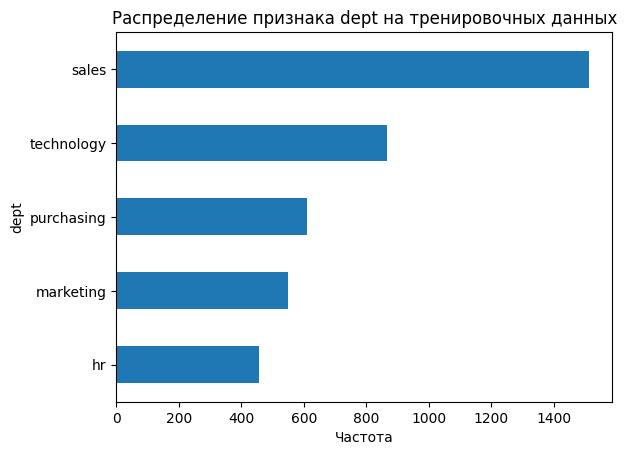

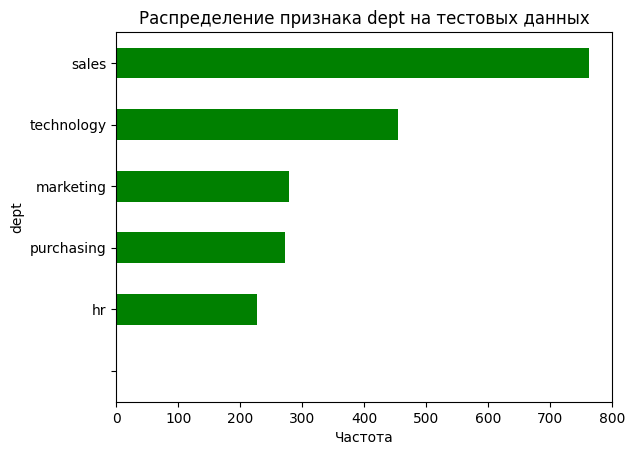

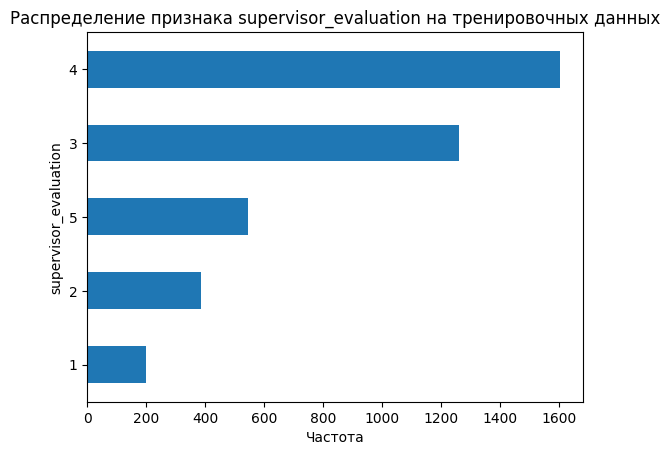

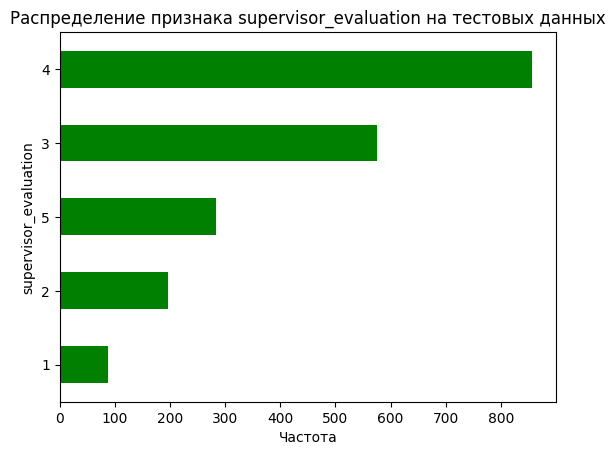

In [29]:
for feature in ['dept', 'supervisor_evaluation']:
    (train_df_jsr
     .pivot_table(index=feature, values='salary', aggfunc='count')
     .reset_index().sort_values(by='salary').plot(kind='barh', y='salary', x=feature, legend=False))
    plt.xlabel('Частота')
    plt.ylabel(feature)
    plt.title(f'Распределение признака {feature} на тренировочных данных')
    
    (X_test_jsr
     .pivot_table(index=feature, values='salary', aggfunc='count')
     .reset_index().sort_values(by='salary').plot(kind='barh', y='salary', x=feature, legend=False, color='g'))
    plt.xlabel('Частота')
    plt.ylabel(feature)
    plt.title(f'Распределение признака {feature} на тестовых данных')

**Интерпретация графиков:**
- Самый большой отдел - Продажи, численность более 1400 сотрудников
- Следом идут технологический и закупки - показатели 900 и 600 сотрудников
- Меньше всего сотрудников - в HR-отделе  (400) и в отделе маркетинга (чуть менее 600)
- Распределения одинаковы на тренировочных и тестовых данных

С количественными признаками закончили. Переходим к **целевому признаку - удовлетворенности работой** и его распределению.

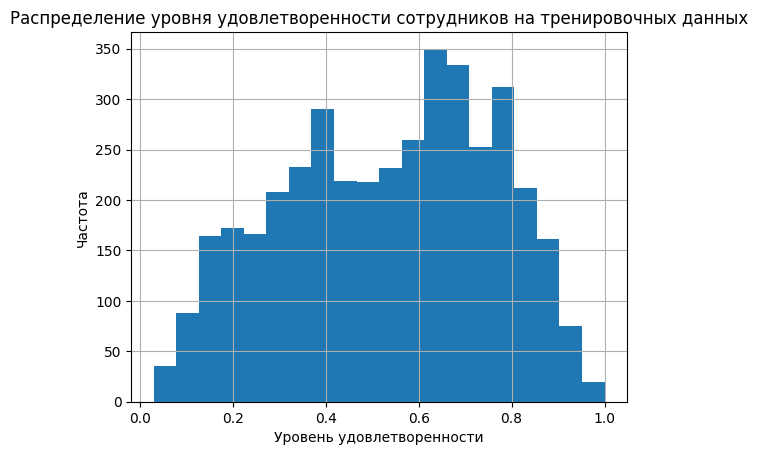

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64


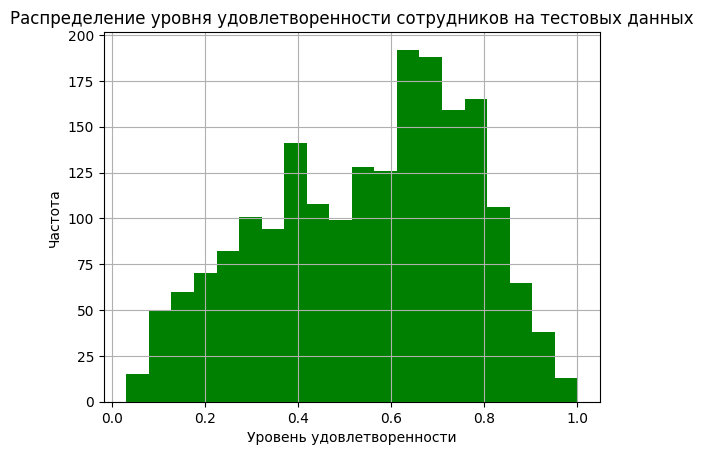

In [30]:
train_df_jsr['job_satisfaction_rate'].hist(bins=20)
plt.ylabel('Частота')
plt.xlabel('Уровень удовлетворенности')
plt.title('Распределение уровня удовлетворенности сотрудников на тренировочных данных')
plt.show()
print(train_df_jsr['job_satisfaction_rate'].describe())

y_test_jsr['job_satisfaction_rate'].hist(bins=20, color='g')
plt.ylabel('Частота')
plt.xlabel('Уровень удовлетворенности')
plt.title('Распределение уровня удовлетворенности сотрудников на тестовых данных')
plt.show()

**Интерпретация графика:**
- Распределение на тестовых данных и на тренировочных одинаковое
- Среднее значение - 0.53, медиана 0.56. Большая часть сотрудников (75%) имеет уровень удовлетворенности 0.71 или ниже.
- Распределение уровня удовлетворенности напоминает нормальное со смещением вправо, на графике присутствуют  несколько пиков - около 0.4, 0.6 и 0.8.

#### Корреляционны анализ данных

Проведем корреляционный анализ данных на тренировочной выборке для определения. Обратим внимание, какие признаки сильнее всего влияют на целевой. Для корреляционного анализа будем использовать phik.

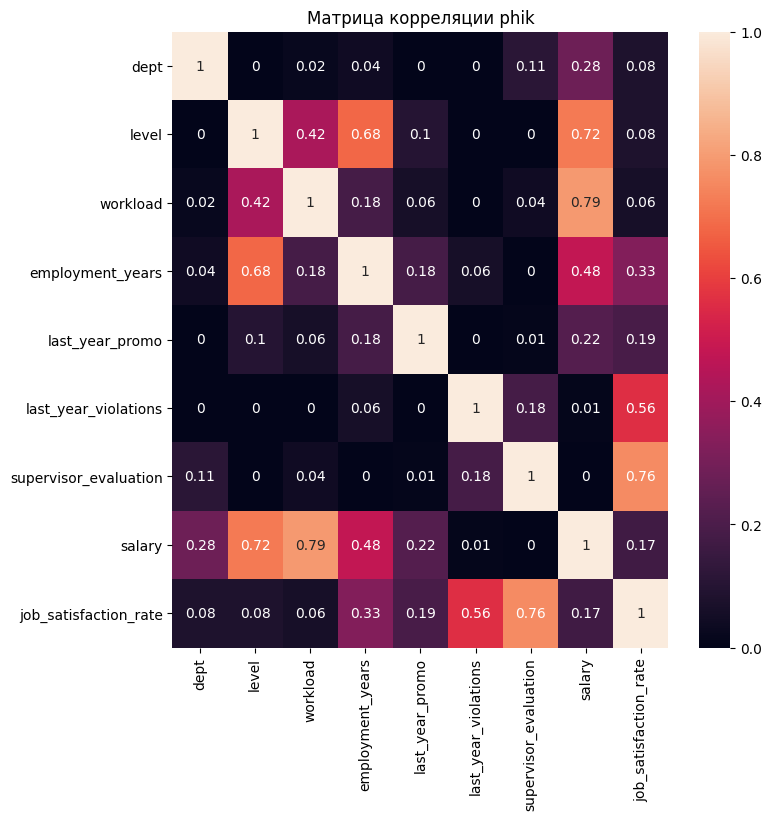

In [31]:
matrix = train_df_jsr.phik_matrix(
    interval_cols=['employment_years', 'salary', 'job_satisfaction_rate']).round(2)
plt.figure(figsize=(8,8))
sns.heatmap(data=matrix, annot=True)
plt.title('Матрица корреляции phik')
plt.show()

**Интерпретация тепловой карты:**
- Сильнее всего на целевой признак влияет `оценка качества работы сотрудника руководителем` (коэфф. 0.76 - значительная зависимость) 
- `Нарушения трудового договора` заметно влияют на целевой признак (коэфф. 0.56)
- Присутствует средняя зависимость целевого признака от `трудового стажа в компании` (коэфф. 0.33)
- Мультиколлинеарность отсутствует

**Вывод по исследовательскому анализу данных:**

- Распределения признаков на тренировочной и тестовой выборках одинаковы.
- Распределение `длительности работы в компании` не имееет форму нормального, чем больше этот признак, тем меньше частота. В среднем сотрудники работают в компании 3.7 года (медиана 3 года)
- Форма распределения `зарплаты` сотрудников напоминает нормальное со смещением влево, также присутствует очень высокий пик около 30.000, это значение похоже на среднее и медиану.
- Большая часть сотрудников - начального и среднего `уровня` (junior и middle), 47% и 44% соответственно. Ведущих специалистов (senior) - всего 9%
- 52% сотрудников имеют среднюю `загруженность`, 30% - низкую, и только 18% - высокую
- 97% сотрудников не получали `повышение` за последний год и всего оставшиеся 3% получили
- 86% сотрудников `не нарушали трудовой договор` за последний год, 14% нарушали.
- Самый большой `отдел` - Продажи, в тренировочной выборке более 1400 сотрудников оттуда. Следом идут технологический и закупки - показатели 900 и 600 сотрудников. Меньше всего сотрудников - в HR-отделе  (400) и в отделе маркетинга (чуть менее 600)
- Распределение `уровня удовлетворенности` напоминает нормальное со смещением вправо, на графике присутствуют  несколько пиков - около 0.4, 0.6 и 0.8. Среднее значение - 0.53, медиана 0.56. Большая часть сотрудников (75%) имеет показать 0.71 или ниже.

**Корреляционный анализ:**
- Сильнее всего на целевой признак влияет `оценка качества работы сотрудника руководителем` (коэфф. 0.76 - значительная зависимость) 
- `Нарушения трудового договора` заметно влияют на целевой признак (коэфф. 0.56)
- Присутствует средняя зависимость целевого признака от `трудового стажа в компании` (коэфф. 0.33)
- Мультиколлинеарность отсутствует

**Необходимая подготовка:**
1. Необходимо стандартизировать признаки: `продолжительность работы в компании`, `зарплата`
2. Необходимо закодировать признаки: `уровень`, `загруженность`, `получение повышения`, `нарушение трудового договора`, `отдел`
- Признак `оценка качества работы сотрудника руководителем` - и так закодирован, кодировать оценку в 5-балльной шкале нет необходимости.

## Уровень удовлетворенности. Обучение моделей.

Прогнозирование уровня удовлетворенности - задача регрессии, для ее решения будем обучать модели линейной регрессии и дерево решений.

Сначала необходимо подготовить данные для обучения. Для подготовки данных будем использовать пайплайн jsr_data_preprocessor.

In [32]:
RANDOM_STATE = 42

# Списки для хранения названий признаков
jsr_ohe_list = ['last_year_promo',
                'last_year_violations', 'dept']
jsr_ord_list = ['level', 'workload']
jsr_num_list = ['employment_years', 'salary']

In [33]:
# Пайплайны
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe_nan', SimpleImputer(
            missing_values=np.nan, strategy='most_frequent')),
        ('simpleImputer_ohe_dull', SimpleImputer(
            missing_values=' ', strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore',
         drop='first', sparse_output=False))
    ]
)

ord_pipe = Pipeline(
    [
        ('simpleImputer_ord_before', SimpleImputer(
            missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'senior'], [
         'low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_ord_after', SimpleImputer(
            missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, jsr_ohe_list),
        ('ord', ord_pipe, jsr_ord_list),
        ('num', StandardScaler(), jsr_num_list)
    ],
    remainder='passthrough'
)

jsr_pipeline_final = Pipeline(
    [
        ('jsr_preprocessor', data_preprocessor),
        ('jsr_models', LinearRegression())
    ]
)

Пайплайн для предобработки данных и обучения модели готов. Осталось реализовать метрику SMAPE и обучить модель, подобрав гиперпараметры

In [34]:
# Определим метрику SMAPE при помощи функции
def smape_metric(y_true, y_pred):
    n = len(y_true)
    return ((100/n) * np.sum((abs(y_true - y_pred)) / ((abs(y_pred) + abs(y_true))/2)))

smape_score = make_scorer(
    smape_metric,
    greater_is_better=False
)

Метрика готова. Остался последний шаг - подбор наиболее эффективной модели и гиперпараметров.

In [35]:
# Разделим датасет на таргет и входные
X_train_jsr = train_df_jsr.drop('job_satisfaction_rate', axis=1)
y_train_jsr = train_df_jsr['job_satisfaction_rate']

# Список гиперпараметров
jsr_parameters = [
    {'jsr_models': [LinearRegression()],
     'jsr_preprocessor__num': [StandardScaler(), MinMaxScaler()]},
    {'jsr_models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'jsr_models__min_samples_split': range(2, 10),
     'jsr_models__max_depth': range(2, 15),
     'jsr_models__min_samples_leaf': range(2, 7),
     'jsr_preprocessor__num': [StandardScaler(), MinMaxScaler()]}
]

search = RandomizedSearchCV(
    jsr_pipeline_final,
    jsr_parameters,
    scoring=smape_score,
    cv=10,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=50
)

search.fit(X_train_jsr, y_train_jsr)
model = search.best_estimator_

print(f'Лучшая SMAPE на кросс-валидации: {-search.best_score_}')
print(model)

Лучшая SMAPE на кросс-валидации: 14.389554381209852
Pipeline(steps=[('jsr_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_dull',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
               

**Лучшая модель:** Дерево решений с максимальной глубиной 14, минимальным количеством объектов в листе 2 и минимальных объектов в узле 7

Проведем дополнительный анализ метрики у 10 лучших моделей, которые удалось найти.

In [36]:
# 10 лучших моделей ищем с помощью сортировки списка моделей по средней метрике в порядке возрастания
jsr_model_top_10 = pd.DataFrame(search.cv_results_).sort_values(
    by='rank_test_score')['mean_test_score'].head(10)
jsr_model_top_10 = jsr_model_top_10.reset_index()
jsr_model_top_10.columns = ['id', 'smape_score']
jsr_model_top_10['smape_score'] = jsr_model_top_10['smape_score'] * (-1)
jsr_model_top_10.head(10)

,id,smape_score
0,43,14.389554
1,4,14.513197
2,23,14.516749
3,8,14.516749
4,3,14.529654
5,12,14.544703
6,1,14.708128
7,38,14.708128
8,6,14.717094
9,32,14.722891


Все 10 моделей имеют метрику smape от 14.7 до 14.3, разброс между 1 и 2 местом составляет 0.2. Показатель лучшей модели - метрика SMAPE равная 14.3

Перейдем к проверке модели на тестовой выборке.

In [37]:
# Соберем в единый датафрейм все данные, чтобы целевые показатели соответствовали входным и своим id
test_df_full = X_test_jsr.reset_index().merge(
    y_test_jsr.reset_index(), how='inner', on='id')
X_test_jsr = test_df_full.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test_jsr = test_df_full.drop(['dept', 'level', 'workload', 'employment_years',
                                'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
                                'salary', 'index'], axis=1)

y_test_pred_jsr = search.best_estimator_.predict(X_test_jsr)
print(
    f'SMAPE на тестовой выборке: {smape_metric(y_test_jsr["job_satisfaction_rate"], y_test_pred_jsr)}')

SMAPE на тестовой выборке: 13.636690694096817


**Вывод по результатам обучения моделей:**
- **Лучшая модель:** Дерево решений с максимальной глубиной 14, минимальным количеством объектов в листе 5 и минимальных объектов в узле 6.
- Показатель лучшей модели на тестовой выборке 13.6, это отличный результат

**Какие модели были "лучшими" во время подбора гиперпараметров, но имеют более точные альтернативы:**
- Модель, в которой закодированы все признаки, в том числе `оценка качества работы сотрудника руководителем` с помощью OrdinalEncoder, результат хуже
- Модель, в которой отсутствуют признаки со слабой корреляцией (уровень специалиста, отдел, загруженность), результат незначительно хуже

Задача завершена, можно переходить к следующей.

## Увольнение сотрудника. Исследовательский анализ данных.

Проведем исследовательский анализ данных для второй задачи. **Интерпретация графиков будет описана по данным из тренировочной выборки**.

### Исследовательский анализ

In [38]:
train_df_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


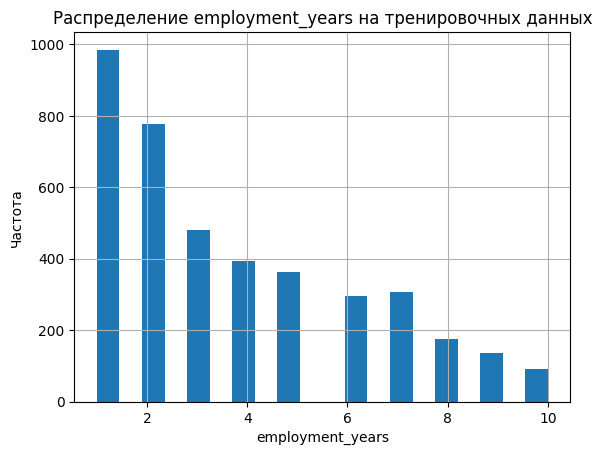

count    4000.000000
mean        3.701500
std         2.541852
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64


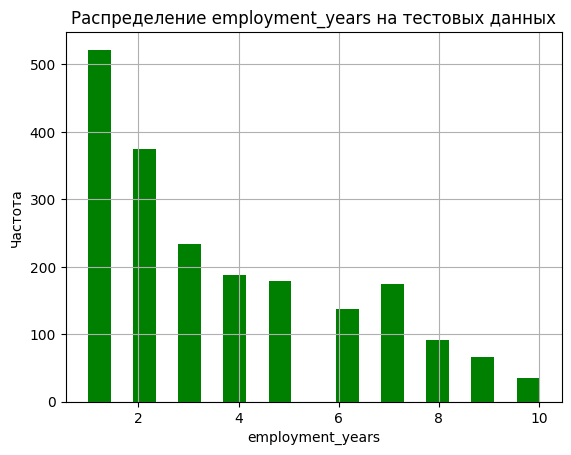

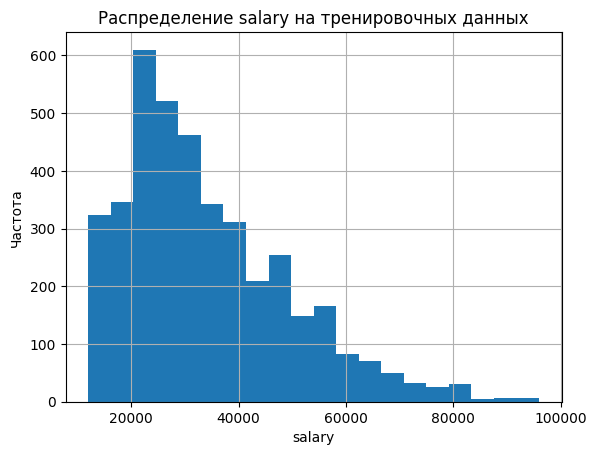

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64


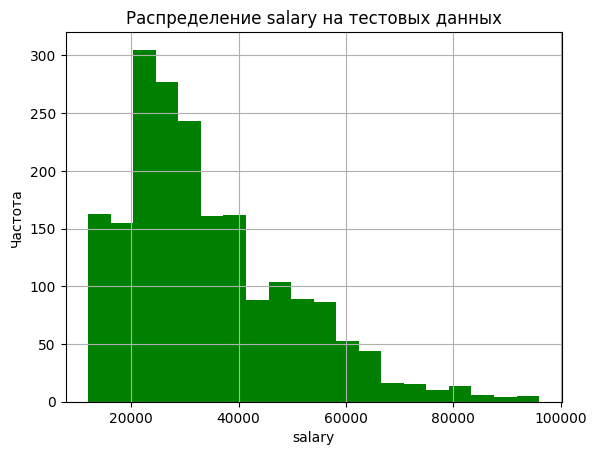

In [39]:
for feature in ['employment_years', 'salary']:
    train_df_quit[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} на тренировочных данных')
    plt.show()
    print(train_df_quit[feature].describe())
    X_test_quit[feature].hist(bins=20, color='g')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} на тестовых данных')
    plt.show()
    X_test_quit[feature].describe()

**Интерпретация графиков:**
- Распределения на тренировочной и тестовой выборках одинаковы
- Распределение стажа работы в компании не имеет форму нормального распределения, с увеличением количества проработанных в компании лет, снижается количество таких сотрудников. В среднем в компании работают 3.7 года, медиана - 3 года, 75% сотрудников работают 6 лет или меньше.
- Распределение зарплаты похоже на нормальное со смещением влево, аналогично данным для предыдущей задачи. Средняя зарплата сотрудников из таблицы - 33.805, а большинство получают 43.200 или меньше (75% сотрудников). Данные о сотрудниках с зарплатой более 82 тысяч проверим детальнее - аналогично предыдущей задаче, нам необходимо убедиться, что это не выбросы.

In [40]:
train_df_quit.loc[train_df_quit['salary'] >= 82000]

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
113657,technology,senior,high,5,yes,no,3,82800,no
208223,technology,senior,high,7,no,no,3,94800,no
694599,technology,senior,high,1,no,no,4,96000,no
638931,technology,senior,high,10,no,no,4,88800,no
740852,technology,senior,high,8,no,no,4,96000,no
349559,marketing,senior,high,6,yes,no,4,84000,no
312375,technology,senior,high,10,no,no,4,87600,no
953791,technology,senior,high,4,no,no,2,91200,no
172759,technology,senior,high,6,no,no,4,96000,no


Как и в прошлом датасете - это сотрудники с высоким уровнем загрузки и высокими компетенциями, это не выбросы.

Признаки `уровень специалиста`, `загруженность`, `было ли повышение` и `нарушение договора` визуализируем при помощи круговой диаграммы.

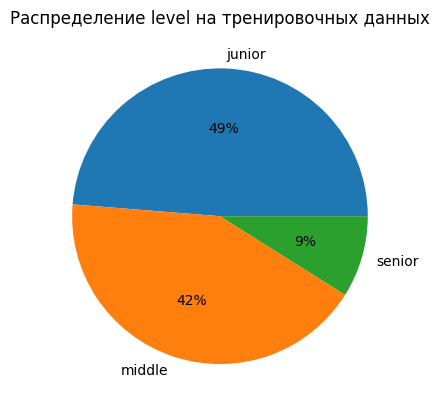

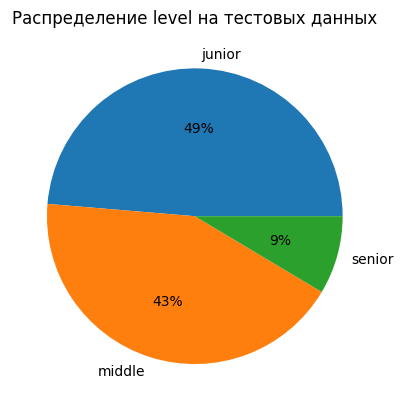

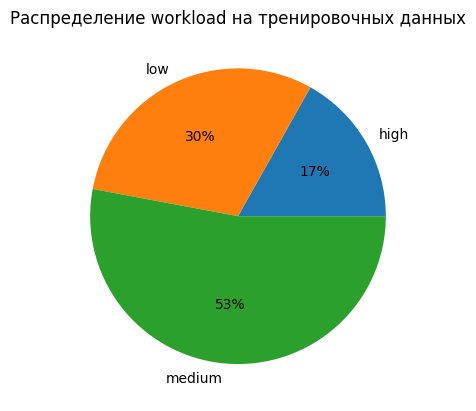

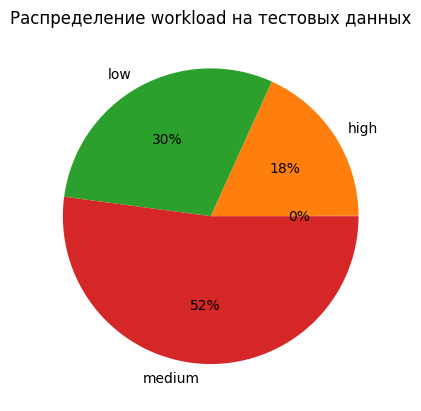

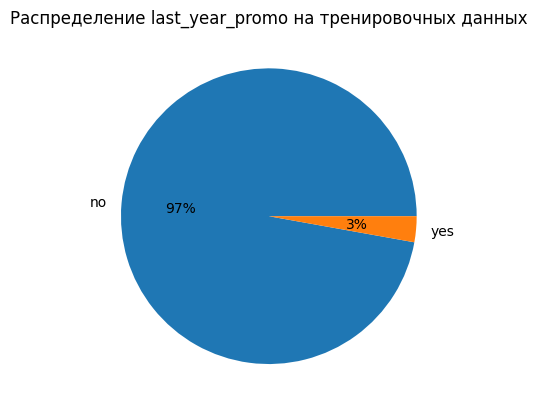

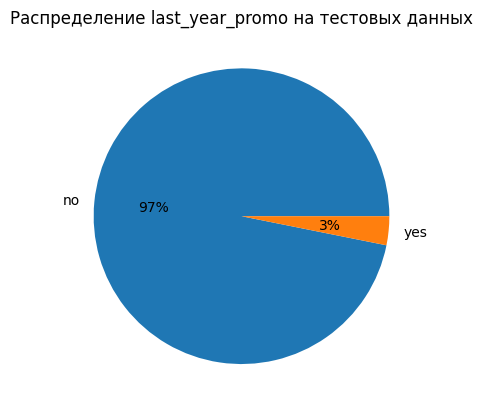

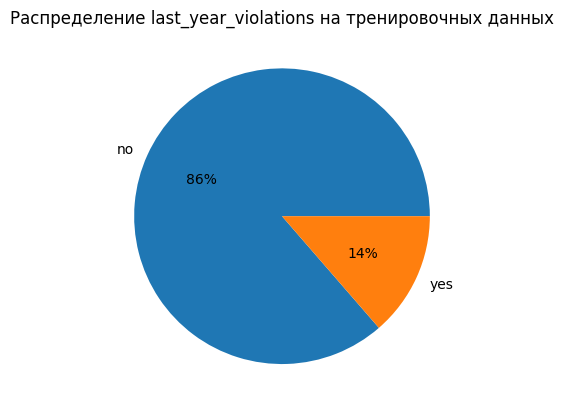

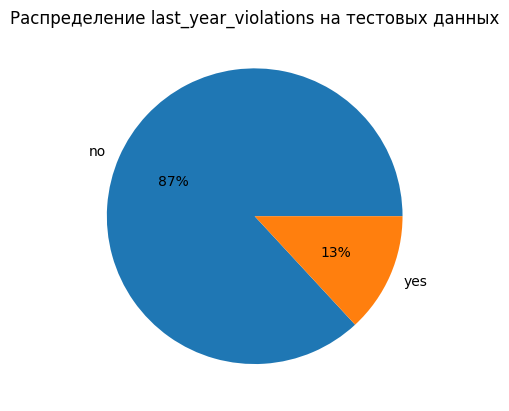

In [41]:
for feature in ['level', 'workload', 'last_year_promo', 'last_year_violations']:
    train_df_quit.pivot_table(index=feature, values='dept', aggfunc='count').plot(
        kind='pie', x=feature, y='dept', autopct='%1.0f%%', legend=False)
    plt.title(f'Распределение {feature} на тренировочных данных')
    plt.ylabel('')
    
    X_test_quit.pivot_table(index=feature, values='dept', aggfunc='count').plot(
        kind='pie', x=feature, y='dept', autopct='%1.0f%%', legend=False)
    plt.title(f'Распределение {feature} на тестовых данных')
    plt.ylabel('')

**Интерпретация графиков:** (выводы аналогичны задаче 1, продублируем их)
- Распределения на тестовых и тренировочных данных очень похожие
- Большая часть сотрудников - начального и среднего уровня (junior и middle), 47% и 44% соответственно. Ведущих специалистов (senior) - всего 9%
- 52% сотрудников имеют среднюю загруженность, 30% - низкую, и только 18% - высокую
- 97% сотрудников не получали повышение за последний год и всего оставшиеся 3% получили
- 86% сотрудников не нарушали трудовой договор за последний год, 14% нарушали.

Признаки `Отдел`, `оценка руководителем` визуализируем с помощью столбчатых диаграмм

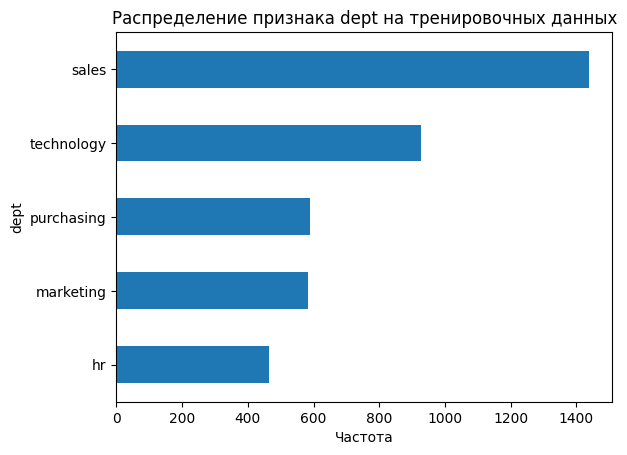

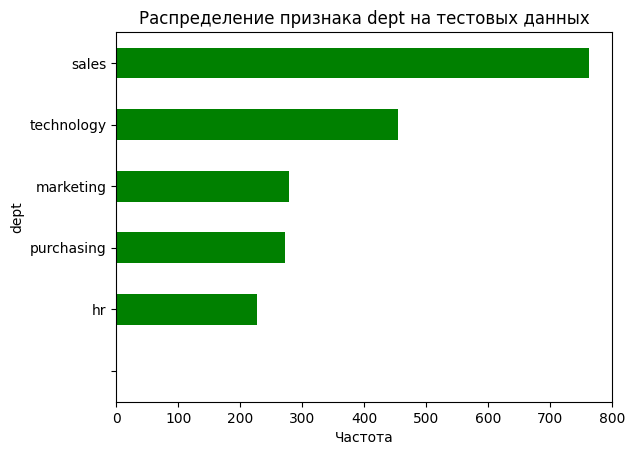

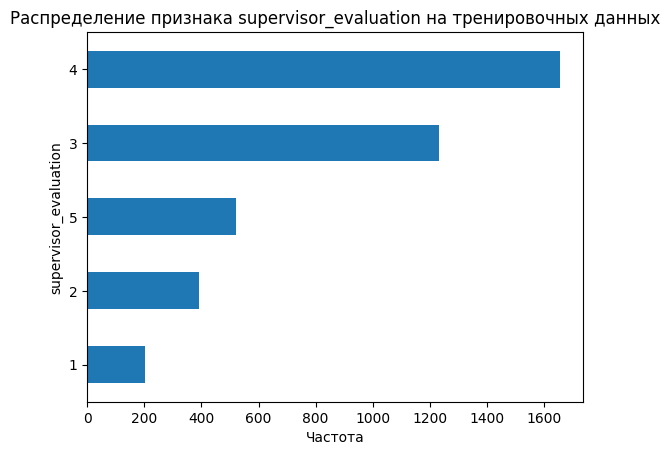

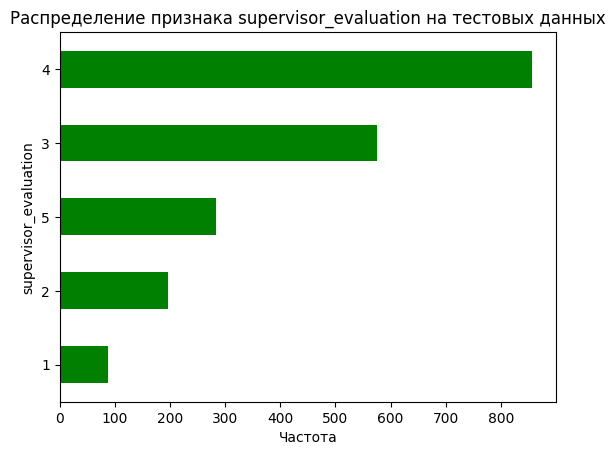

In [42]:
for feature in ['dept', 'supervisor_evaluation']:
    (train_df_quit
     .pivot_table(index=feature, values='salary', aggfunc='count')
     .reset_index().sort_values(by='salary').plot(kind='barh', y='salary', x=feature, legend=False))
    plt.xlabel('Частота')
    plt.ylabel(feature)
    plt.title(f'Распределение признака {feature} на тренировочных данных')
    
    (X_test_quit
     .pivot_table(index=feature, values='salary', aggfunc='count')
     .reset_index().sort_values(by='salary').plot(kind='barh', y='salary', x=feature, legend=False, color='g'))
    plt.xlabel('Частота')
    plt.ylabel(feature)
    plt.title(f'Распределение признака {feature} на тестовых данных')

**Интерпретация графиков:** (выводы аналогичны задаче 1, продублируем их)
- Самый большой отдел - Продажи, численность более 1400 сотрудников
- Следом идут технологический и закупки - показатели 900 и 600 сотрудников
- Меньше всего сотрудников - в HR-отделе  (400) и в отделе маркетинга (чуть менее 600)
- Распределения одинаковы на тренировочных и тестовых данных

Изучим распределение целевого признака - увольнение сотрудника. Для этого будем использовать круговую диаграмму.

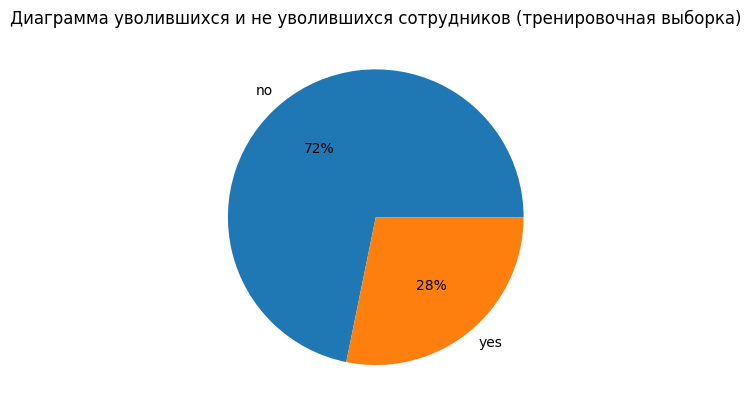

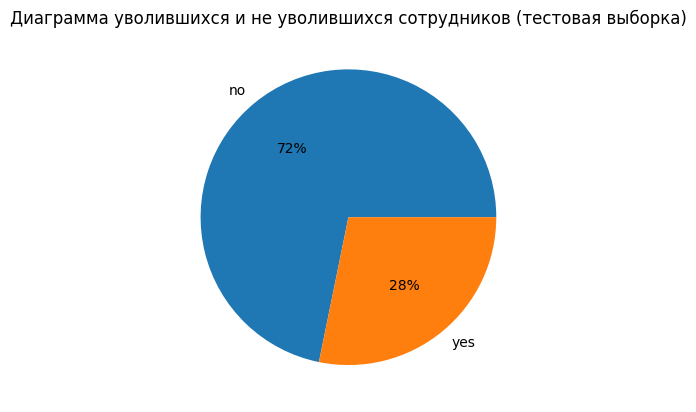

In [43]:
(train_df_quit.pivot_table(index='quit', values='salary', aggfunc='count')
 .plot(kind='pie', y='salary', x='quit', autopct='%1.0f%%', legend=False))
plt.title('Диаграмма уволившихся и не уволившихся сотрудников (тренировочная выборка)')
plt.ylabel('')
plt.show()

(y_test_quit.pivot_table(index='quit', values='id', aggfunc='count')
 .plot(kind='pie', y='id', x='quit', autopct='%1.0f%%', legend=False))
plt.title('Диаграмма уволившихся и не уволившихся сотрудников (тестовая выборка)')
plt.ylabel('')
plt.show()

**Интерпретация:**
- Распределения уволившихся в тестовой и тренировочной выборке одинаковые
- Присутствует дисбаланс классов (28% уволились, и 72% нет)

### Портрет уволившегося сотрудника

Изучим детальнее уволившихся сотрудников и составим их портрет. Начнем с анализа количественных признаков.

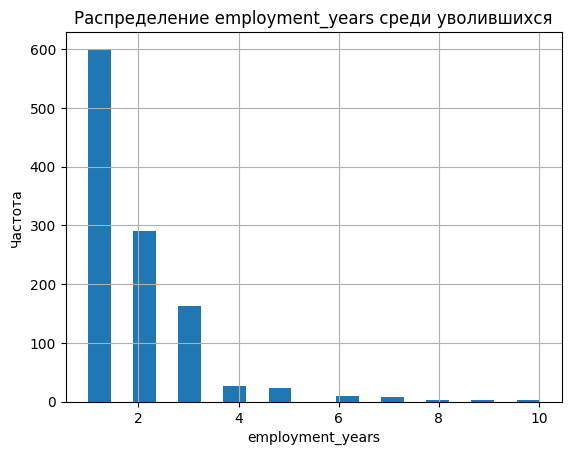

count    1128.000000
mean        1.844858
std         1.274920
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: employment_years, dtype: float64


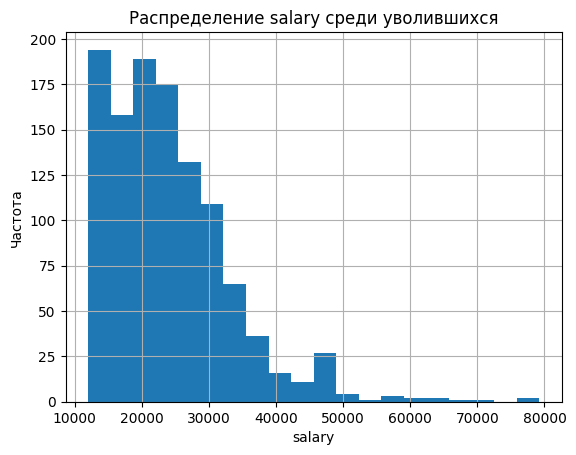

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64


In [44]:
quit_employee = train_df_quit.loc[train_df_quit['quit'] == 'yes']

for feature in ['employment_years', 'salary']:
    quit_employee[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.title(f'Распределение {feature} среди уволившихся')
    plt.show()
    print(quit_employee[feature].describe())

**Интерпретация графиков:**
- Большинство уволившихся работали в компании не больше 2 лет
- Большинство уволившихся получали зарплату ниже средней и медианной по компании, распределение напоминает нормальное, сильно сдвинутое влево. Средняя зарплата уволившихся - 23.885, медианная 22.800 (против 33 тысяч средней зарплаты среди всех и 30.000 медианной зарплаты среди всех)

Посмотрим на категориальные признаки нашего среза с уволившимися

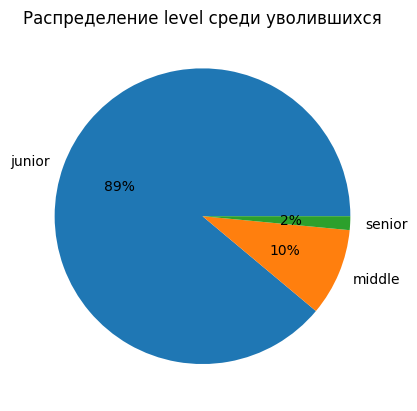

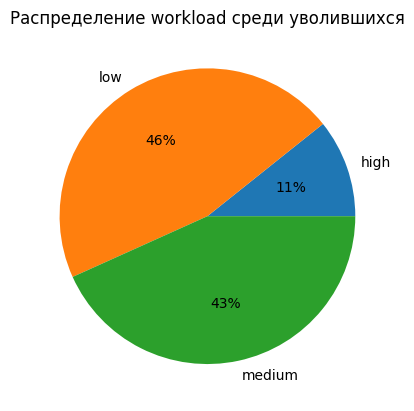

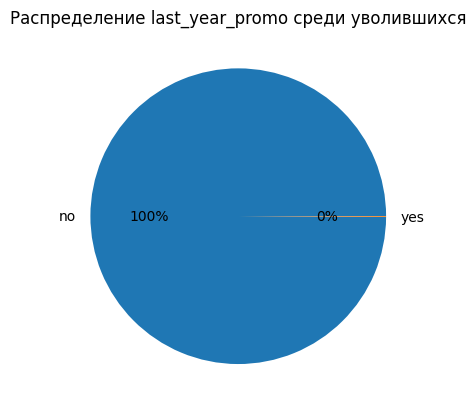

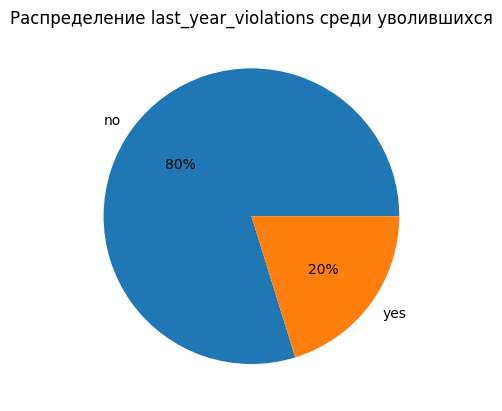

In [45]:
for feature in ['level', 'workload', 'last_year_promo', 'last_year_violations']:
    quit_employee.pivot_table(index=feature, values='dept', aggfunc='count').plot(
        kind='pie', x=feature, y='dept', autopct='%1.0f%%', legend=False)
    plt.title(f'Распределение {feature} среди уволившихся')
    plt.ylabel('')

**Интерпретация графиков:**
- Большинство уволившихся - начинающие специалисты (почти 90%), меньше - среднего (10%), и всего 2% ведущие
- Распределение загрузки среди уволившихся в сравнении со всей выборкой очень похожее
- Среди уволившихся никто не получал повышение (100% не получали)
- Распределение нарушения трудового договора среди уволившихся аналогично с распределением на всей выборке

Можно двигаться к следующим признакам

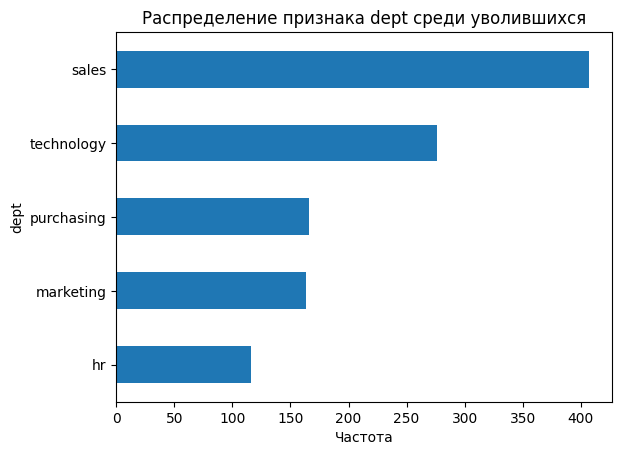

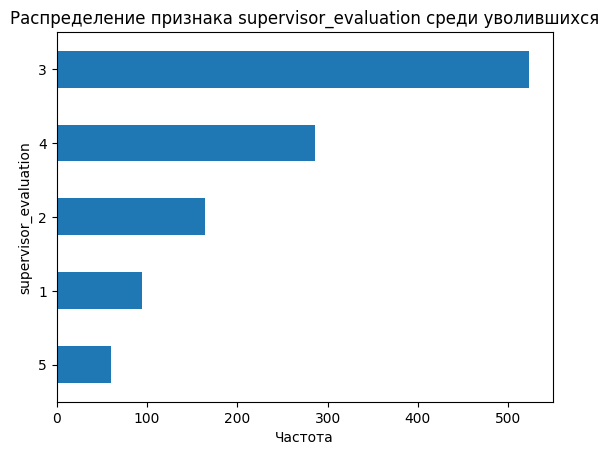

In [46]:
for feature in ['dept', 'supervisor_evaluation']:
    (quit_employee
     .pivot_table(index=feature, values='salary', aggfunc='count')
     .reset_index().sort_values(by='salary').plot(kind='barh', y='salary', x=feature, legend=False))
    plt.xlabel('Частота')
    plt.ylabel(feature)
    plt.title(f'Распределение признака {feature} среди уволившихся')

Посмотрим, какова доля уволившихся в каждом из отделов

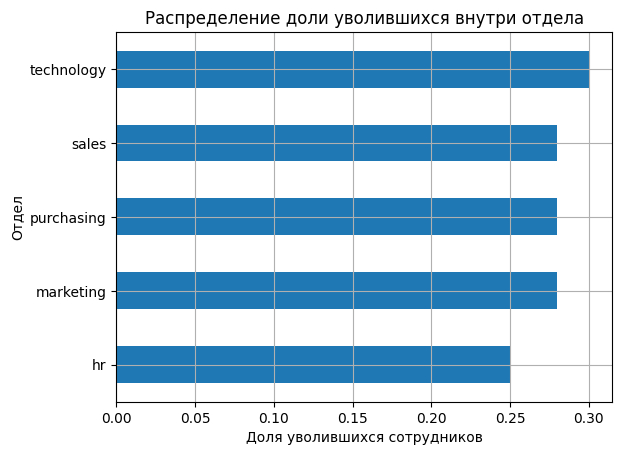

In [47]:
report = (quit_employee.pivot_table(index='dept', values='salary', aggfunc='count')
          .merge(train_df_quit.pivot_table(index='dept', values='salary', aggfunc='count'), on='dept', how='inner'))
report.columns = ['quit_employee', 'all_employee']
report['quit_share'] = (report['quit_employee'] / report['all_employee']).round(2)
report = report.reset_index().sort_values(by='quit_share', ascending=True)

# Визуализация
report.plot(kind='barh', y='quit_share', x='dept', grid=True, legend=False)
plt.title('Распределение доли уволившихся внутри отдела')
plt.xlabel('Доля уволившихся сотрудников')
plt.ylabel('Отдел')
plt.show()

**Интерпретация графика:**
- Наибольшая доля увольнений - в IT отделе - почти 30%
- В отделах продаж, закупок и маркетинга показатель доля уволившихся примерно одинаковый - приблизительно 0.27
- Реже всего уходят сотрудники из отдела маркетинга, показатель доля уволившихся - 0.25

**Интерпретация графиков:**
- Распределение отделов среди уволившихся аналогично распределению на всей выборке, среди уволившихся доля нарушивших чуть выше
- Большинство уволившихся получают удовлетворительную оценку от руководителя (3), в то время как по выборке большинство получает "хорошо" (4)

**Вывод (Портрет уволившегося сотрудника):**
1. Специалист - junior или (реже) middle
2. Средняя зарплата - 23.885
3. Специалист работает в компании от 1 до 2 лет
4. Специалист не получал повышение за последний год
5. Руководитель оценивает работу специалиста на 3 из 5
6. Специалисты, склонные к увольнению, чуть чаще нарушают трудовой договор
7. Сотрудники ИТ Департамента увольняются чаще, чем другие

### Связь уровня удовлетворенности работой и увольнения сотрудника

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение, для этого визуализируем распределения признака уровень удовлетворенности для уволившихся и сравним его с распределением для всей тестовой выборки.

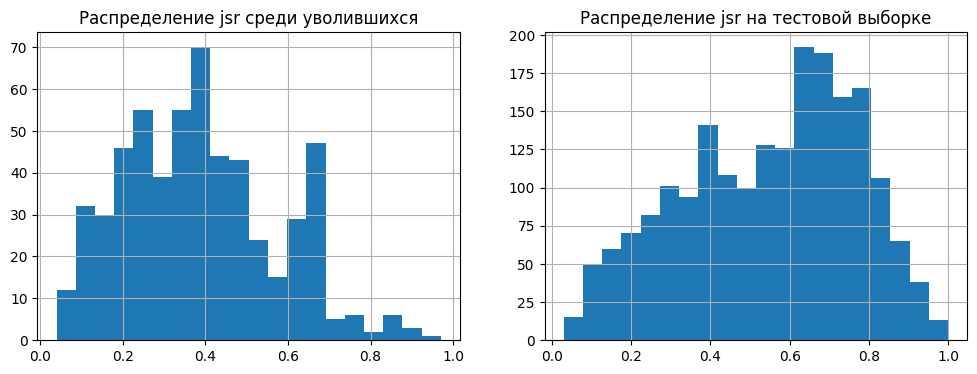

In [48]:
quit_employee_jsr = y_test_quit.merge(y_test_jsr, on='id', how='inner')
quit_employee_jsr = quit_employee_jsr.loc[quit_employee_jsr['quit'] == 'yes']

fig, ax = plt.subplots(1,2, figsize=(12,4))
quit_employee_jsr['job_satisfaction_rate'].hist(bins=20, ax=ax[0])
ax[0].set_title('Распределение jsr среди уволившихся')
y_test_jsr['job_satisfaction_rate'].hist(bins=20, ax=ax[1])
ax[1].set_title('Распределение jsr на тестовой выборке')
plt.show()

In [49]:
print('Описание jsr среди уволившихся:')
print(quit_employee_jsr['job_satisfaction_rate'].describe())

print('\nОписание jsr на тестовой выборке:')
print(y_test_jsr['job_satisfaction_rate'].describe())

Описание jsr среди уволившихся:
count    564.000000
mean       0.387713
std        0.185784
min        0.040000
25%        0.240000
50%        0.370000
75%        0.492500
max        0.970000
Name: job_satisfaction_rate, dtype: float64

Описание jsr на тестовой выборке:
count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64


**Интерпретация графика:**
- Оба распределения напоминают нормальное 
- Распределение уровня удовлетворенности среди уволившихся действительно ниже: среднее значение 0.39 против 0.55, 3-й квартиль 0.49 против 0.72.

**Вывод:** Уровень удовлетворенности работой влияет на увольнение: показатели уволившихся ниже, чем по всей выборке

**Общий вывод по Исследовательскому анализу данных:**

- Общий анализ:
    - Распределения на тренировочной и тестовой выборках одинаковые
    - Распределение `стажа работы` в компании не имеет форму нормального распределения, с увеличением количества проработанных в компании лет, снижается количество таких сотрудников. В среднем в компании работают 3.7 года, медиана - 3 года, 75% сотрудников работают 6 лет или меньше.
    - Распределение `зарплаты` похоже на нормальное со смещением влево, аналогично данным для предыдущей задачи. Средняя зарплата сотрудников из таблицы - 33.805, а большинство получают 43.200 или меньше (75% сотрудников). Данные о сотрудниках с зарплатой более 82 тысяч проверим детальнее - аналогично предыдущей задаче, нам необходимо убедиться, что это не выбросы.
    - Большая часть сотрудников - начального и среднего `уровня` (junior и middle), 47% и 44% соответственно. Ведущих специалистов (senior) - всего 9%
    - 52% сотрудников имеют среднюю `загруженность`, 30% - низкую, и только 18% - высокую
    - 97% сотрудников `не получали повышение за последний год` и всего оставшиеся 3% получили
    - 86% сотрудников `не нарушали трудовой договор за последний год`, 14% нарушали.
    - Самый большой `отдел` - Продажи, численность более 1400 сотрудников. Следом идут технологический и закупки - показатели 900 и 600 сотрудников. Меньше всего сотрудников - в HR-отделе  (400) и в отделе маркетинга (чуть менее 600) 
    - Распределения `уволившихся` в тестовой и тренировочной выборке одинаковые. Присутствует дисбаланс классов (28% уволились, и 72% нет)
- Портрет уволившегося сотрудника
    1. Специалист - junior или (реже) middle
    2. Средняя зарплата - 23.885
    3. Специалист работает в компании от 1 до 3 лет
    4. Специалист не получал повышение за последний год
    5. Руководитель оценивает работу специалиста на 3 из 5
    6. Специалисты, склонные к увольнению, чуть чаще нарушают трудовой договор
    7. Сотрудники ИТ Департамента увольняются чаще, чем другие
- Влияние уровня удовлетворенности работой на увольнение
    - Уровень удовлетворенности работой влияет на увольнение: показатели уволившихся ниже, чем по всей выборке: среднее значение 0.39 против 0.55, 3-й квартиль 0.49 против 0.72.

## Увольнение сотрудника. Обучение моделей.

### Добавление нового признака

В ходе исследовательского анализа мы выяснили, что уровень удовлетворенности работой сотрудника влияет на увольнение. Для того, чтобы построить более точную модель прогнозирования увольнения сотрудника, нам поможет модель из задачи 1: в тренировочном датасете для задачи 2 нет данных об уровне удовлетворенности сотрудников. Предскажем его с помощью нашей лучшей модели.

Прежде, чем начать, заменим значения `'quit'` на 1 и 0 для удобства. 1 - уволился, 0 - нет

In [50]:
for df in [train_df_quit, y_test_quit]:
    df.loc[df['quit'] == 'yes', 'quit'] = 1
    df.loc[df['quit'] == 'no', 'quit'] = 0
    df['quit'] = df['quit'].astype('int')

# Синхронизируем 'id' и целевой показатель. Добавим в тестовую выборку новый признак 
test_df_full_quit = X_test_quit.reset_index().merge(y_test_quit, on='id', how='inner')

X_test_quit = test_df_full_quit.drop(['id', 'quit'], axis=1)
X_test_quit['job_satisfaction_rate'] = search.best_estimator_.predict(X_test_quit)
y_test_quit = test_df_full_quit['quit']    
    
# Добавление нового признака в тренировочную выборку    
train_df_quit['job_satisfaction_rate'] = search.best_estimator_.predict(train_df_quit)
train_df_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,0,0.648000
814010,sales,junior,medium,2,no,no,4,27600,0,0.821905
155091,purchasing,middle,medium,5,no,no,1,37200,0,0.326667
257132,sales,junior,medium,2,no,yes,3,24000,1,0.340000
910140,marketing,junior,medium,2,no,no,5,25200,0,0.795000


### Подготовка данных и обучение моделей

Проводить подготовку данных и обучать модели будем, используя пайплайны. В качестве основы возьмем пайплайн из задачи 1, но в список признаков, которые необходимо будет стандартизировать, будет добавлен `job_satisfaction_rate`, его также необходимо будет стандартизировать.

Пайплайн для обучения будет изменен.

In [51]:
# Списки с названиями признаков
quit_ohe_list = ['last_year_promo',
                'last_year_violations', 'dept']
quit_ord_list = ['level', 'workload']
quit_num_list = ['employment_years', 'salary', 'job_satisfaction_rate']

# Создадим новый препроцессор на основании из созданного для задачи 1
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, quit_ohe_list),
        ('ord', ord_pipe, quit_ord_list),
        ('num', StandardScaler(), quit_num_list)
    ],
    remainder='passthrough'
)

# Пайплайн для задачи 2
quit_pipeline_final = Pipeline(
    [
        ('quit_preprocessor', data_preprocessor),
        ('quit_models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

Гиперпараметры модели будем подбирать с помощью RandomizedSearchCV.

In [52]:
# Разделим тренировочный датасет на таргет и тест
X_train_quit = train_df_quit.drop('quit', axis=1)
y_train_quit = train_df_quit['quit']

# Список гиперпараметров
quit_parameters = [
    {'quit_models': [LogisticRegression(random_state=RANDOM_STATE)],
     'quit_models__C': range(1, 10),
     'quit_preprocessor__num': [StandardScaler(), MinMaxScaler()]},
    {'quit_models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'quit_models__min_samples_split': range(2, 5),
     'quit_models__max_depth': range(2, 6),
     'quit_models__min_samples_leaf': range(2, 7),
     'quit_preprocessor__num': [StandardScaler(), MinMaxScaler()]},
    {'quit_models': [SVC(random_state=RANDOM_STATE, probability=True)],
     'quit_models__C': [1, 3, 5],
     'quit_models__kernel': ['rbf', 'poly', 'sigmoid'],
     'quit_preprocessor__num': [StandardScaler(), MinMaxScaler()]},
    {'quit_models': [KNeighborsClassifier()],
     'quit_models__n_neighbors': (5, 20),
     'quit_preprocessor__num': [StandardScaler(), MinMaxScaler()]}
]

quit_search = RandomizedSearchCV(
    quit_pipeline_final,
    quit_parameters,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=100
)

Найдем лучшую модель

In [53]:
quit_search.fit(X_train_quit, y_train_quit)

print(f'Лучшая ROC-AUC на кросс-валидации: {quit_search.best_score_}')
print(quit_search.best_estimator_)

Лучшая ROC-AUC на кросс-валидации: 0.9310235396399278
Pipeline(steps=[('quit_preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('simpleImputer_ohe_dull',
                                                                   SimpleImputer(missing_values=' ',
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
            

**Лучшая модель:** Классификатор на основе метода опорных векторов (SVC) с коэффициентом регуляризации 5.

Проведем анализ метрик лучших 10 моделей

In [54]:
# 10 лучших моделей ищем с помощью сортировки списка моделей по средней метрике в порядке возрастания
quit_model_top_10 = pd.DataFrame(quit_search.cv_results_).sort_values(
    by='rank_test_score')['mean_test_score'].head(10)
quit_model_top_10 = quit_model_top_10.reset_index()
quit_model_top_10.columns = ['id', 'roc_auc_score']
quit_model_top_10['roc_auc_score'] = quit_model_top_10['roc_auc_score'] 
quit_model_top_10.head(10)

,id,roc_auc_score
0,25,0.931024
1,88,0.927800
2,96,0.927623
3,44,0.927430
4,30,0.926962
5,64,0.926962
6,86,0.926962
7,61,0.926962
8,63,0.926441
9,28,0.926441


Все 10 моделей демонстрируют результат ROC-AUC: от 0.926 до 0.931 (лучшая модель)

Проверим, какой показатель метрики модель покажет на тестовых данных.

In [55]:
y_test_quit_probas = quit_search.best_estimator_.predict_proba(X_test_quit)[:,1]
print(f'ROC_AUC на тестовой выборке: {roc_auc_score(y_test_quit, y_test_quit_probas)}')

ROC_AUC на тестовой выборке: 0.923495871115589


ROC-AUC 0.92, это достойный результат, к тому же цель выполнена - метрика больше 0.92.

Проанализируем важность признаков. 

PermutationExplainer explainer: 201it [03:06,  1.02it/s]                        


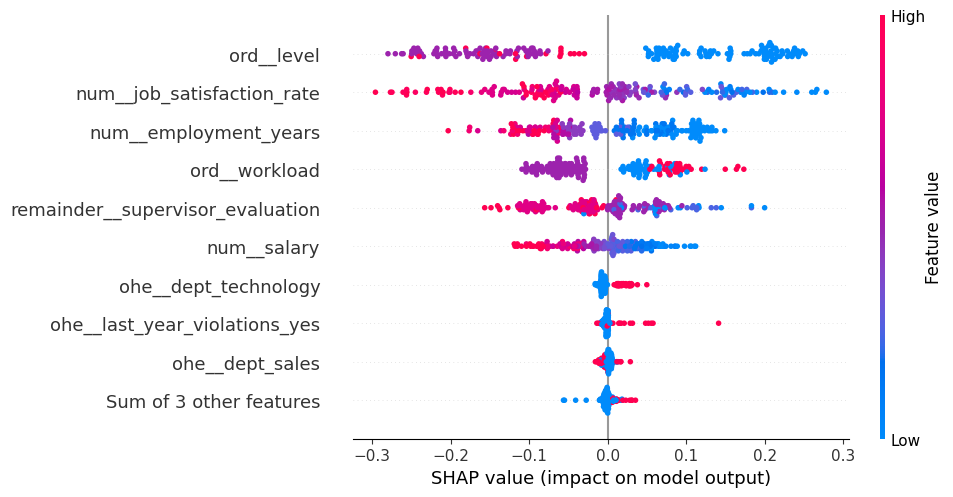

In [56]:
X_train_quit_transformed = quit_search.best_estimator_['quit_preprocessor'].transform(X_test_quit)

quit_explainer = shap.Explainer(
    model=quit_search.best_estimator_['quit_models'].predict_proba,
    data=X_train_quit_transformed,
    feature_names=quit_search.best_estimator_['quit_preprocessor'].get_feature_names_out(),
    masker=X_train_quit_transformed
)

shap_values_quit = quit_explainer(shap.sample(X_train_quit_transformed, 200))
shap.plots.beeswarm(shap_values_quit[:, :, 1])

**Интерпретация графика:**
- Наибольшее влияние на целевой признак имеют: уровень удовлетворенности работой, уровень специалиста, срок работы в компании, загрузка, зарплата и оценка руководителем, отдел (их общая сумма влияния больще 0.02).
- Остальные признаки влияют на целевой на 1% или меньше

**Общий вывод по обучению модели для прогнозирования увольнения сотрудника:**
- Лучшая модель -  **Классификатор на основе метода опорных векторов (SVC) с коэффициентом регуляризации 5.** Ее результат на тестовой выборке - `ROC-AUС, равная 0.92`.
- Модель является лучшей, так как показывает лучший результат по интересующей метрике на кросс-валидации.

**Интерпретация модели:**
- К увольнению более склонны сотрудники низкого уровня (junior), а middle и senior - менее склонны (красные и фиолетовые участки)
- Сотрудники с низким и средним уровнем удовлетворенности работой более склонны к увольнению, чем те, у кого этот показатель высокий
- Высокие и средние значения продолжительности работы в компании приводят говорят о меньшей склонности к увольнению, а низкие - к большей склонности к увольнению
- Менее склонны к увольнению сотрудники со средним уровнем загрузки, а более склонны - с высоким и низким
- Сотрудники со средней-высокой и высокой зарплатой менее склонны к увольнению, чем сотрудники со средней и низкой зарплатой
- Сотрудники со средней-высокой и высокой оценкой руководителя менее склонны к увольнению, чем сотрудники со средней и низкой оценкой

**Рекомендации:**
- Компании выгодно, чтобы сотрудники уровня junior доросли до middle, а middle - до senior как можно скорее, так как этот показатель значительно влияет на увольнение. Чтобы этого достичь, **предлагаем** в каждом подразделении разработать индивидуальные планы развития для каждого сотрудника уровня junior и middle, обозначить цели на будущие периоды и четкие критерии перехода на новый уровень. Компании также выгодно, чтобы сотрудники больше зарабатывали, предложенная в данной рекомендации мера повысит и этот показатель, так как с ростом уровня растет и зарплата.
- Компании выгодно, чтобы сотрудники работали в компании дольше 2-3 лет, это снижает вероятность увольнения - как меру стимулирования **предлагаем** сотрудникам, которые проработали в компании 2 года (и работают третий) повышение зарплаты в виде ежемесячной премии за стаж после того, как будет 3 года с момента трудоустройства. То же самое можно предложить тем, кто проработал 3 года - ежемесячную премию после 4-го года работы. Это позволит стимулировать сотрудников не увольняться, так как работающие в компании 3 года увольняются значительно реже, чем те, кто проработал меньше, а кто работает 4 года и больше - увольняются крайне редко.
- Компании выгодно, чтобы сотрудники были сбалансированно загружены - **предлагаем** поручить руководителям подразделений контролировать, чтобы у их сотрудников стало меньше перегрузки во время рабочего дня и переработок, а а тем, кто недонагружен, необходимо определить и дать дополнительные задачи. Данная мера позволит приблизить уровень загруженности сотрудников к сбалансированному состоянию и снизит вероятность увольнения.
- На увольнение сильно влияет показатель уровень удовлетворенности работой, на который, в свою очередь, значительно влияет оценка руководителем. Чтобы повысить оба эти показателя, **предлагаем** поручить руководителям отделов разработать систему оценивания с критериями и метриками, а сотрудников с оценками 4 и 5 поквартально премировать. Сотрудники будут знать, что конкретно они должны делать, чтобы повысить оценку, а компания не потратит на премии большое количество денег. Как следствие, сотрудники начнут сами влиять на свои оценки, показатель удовлетворенности работой вырастет, и снизится вероятность увольнения.

## Общий вывод

### Вывод по результатам исследования
- Проведена предобработка данных для всех признаков, которые использованы в работе. Обработаны дубликаты, пропущенные значения.
- Проведен исследовательский анализ данных всех признаков, которые использованы в работе. Построены и изучены распределения количественных и категориальных признаков, используя различные методы визуализации (гистограммы для количественных, столбчатые и круговые диаграммы для категориальных).
- Составлен портрет уволившегося сотрудника: 
    1. Специалист - junior или (реже) middle
    2. Средняя зарплата - 23.885
    3. Специалист работает в компании от 1 до 3 лет
    4. Специалист не получал повышение за последний год
    5. Руководитель оценивает работу специалиста на 3 из 5
    6. Специалисты, склонные к увольнению, чуть чаще нарушают трудовой договор
    7. Сотрудники ИТ Департамента увольняются чаще, чем другие
- Найдена и обучена лучшая модель, способная прогнозировать значения уровня удовлетворенности работой у сотрудников на основании входных признаков:
    - **Лучшая модель:** Дерево решений с максимальной глубиной 14, минимальным количеством объектов в листе 5 и минимальных объектов в узле 6. Показатель SMAPE лучшей модели на тестовой выборке 13.9, это отличный результат. Модель обучена на всех признаках.
- Доказана взаимосвязь между уровнем удовлетворенности работой и увольнением. Модель для прогнозирования уровня удовлетворенности использована на тестовых данных, чтобы получить этот показатель и улучшить результаты работы модели для прогнозирования увольнения.
- Найдена и обучена лучшая модель, способная прогнозировать увольнение сотрудника: 
    - **Лучшая модель:** Классификатор на основе метода опорных векторов (SVC) с коэффициентом регуляризации 5. Ее результат на тестовой выборке - `ROC-AUС, равная 0.92`.

### Сформированы следующие рекомендации для бизнеса:
- Компании выгодно, чтобы сотрудники уровня junior доросли до middle, а middle - до senior как можно скорее, так как этот показатель значительно влияет на увольнение. Чтобы этого достичь, **предлагаем** в каждом подразделении разработать индивидуальные планы развития для каждого сотрудника уровня junior и middle, обозначить цели на будущие периоды и четкие критерии перехода на новый уровень. Компании также выгодно, чтобы сотрудники больше зарабатывали, предложенная в данной рекомендации мера повысит и этот показатель, так как с ростом уровня растет и зарплата.
- Компании выгодно, чтобы сотрудники работали в компании дольше 2-3 лет, это снижает вероятность увольнения - как меру стимулирования **предлагаем** сотрудникам, которые проработали в компании 2 года (и работают третий) повышение зарплаты в виде ежемесячной премии за стаж после того, как будет 3 года с момента трудоустройства. То же самое можно предложить тем, кто проработал 3 года - ежемесячную премию после 4-го года работы. Это позволит стимулировать сотрудников не увольняться, так как работающие в компании 3 года увольняются значительно реже, чем те, кто проработал меньше, а кто работает 4 года и больше - увольняются крайне редко.
- Компании выгодно, чтобы сотрудники были сбалансированно загружены - **предлагаем** поручить руководителям подразделений контролировать, чтобы у их сотрудников стало меньше перегрузки во время рабочего дня и переработок, а а тем, кто недонагружен, необходимо определить и дать дополнительные задачи. Данная мера позволит приблизить уровень загруженности сотрудников к сбалансированному состоянию и снизит вероятность увольнения.
- На увольнение сильно влияет показатель уровень удовлетворенности работой, на который, в свою очередь, значительно влияет оценка руководителем. Чтобы повысить оба эти показателя, **предлагаем** поручить руководителям отделов разработать систему оценивания с критериями и метриками, а сотрудников с оценками 4 и 5 поквартально премировать. Сотрудники будут знать, что конкретно они должны делать, чтобы повысить оценку, а компания не потратит на премии большое количество денег. Как следствие, сотрудники начнут сами влиять на свои оценки, показатель удовлетворенности работой вырастет, и снизится вероятность увольнения.